<a href="https://colab.research.google.com/github/Jeong-Bin/DA-PROJECT/blob/main/PROJECT_8%20AutoKeras%20%26%20AutoModel%20-%20mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
# !pip uninstall -y tensorflow keras tf-nightly keras-nightly

In [ ]:
#!pip install tensorflow

In [2]:
from tensorflow.keras.layers import LayerNormalization, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
# mnist 데이터셋 불러오기
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

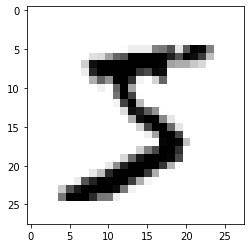

In [4]:
# 이미지 확인
plt.imshow(x_train[0], cmap='binary')

# **기본 AutoKeras**

In [ ]:
!pip install autokeras

In [5]:
import autokeras as ak

In [15]:
# # 싱글 GPU 사용시 에러 해결법(근데 안 되네?ㅋㅋ)
# https://bart-2012.tistory.com/18 
'''
import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
'''

Physical devices cannot be modified after being initialized


In [6]:
ak_model = ak.ImageClassifier(overwrite=True, max_trials=1)
 # ImageClassifierr : 이미지 분류
 # overwrite : 모델을 검색했을 때 해당 매개변수를 덮어씌울지
 # max_trials : 모델을 검색할 횟수
ak_model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Trial 1 Complete [00h 11m 44s]
val_loss: 0.046708349138498306

Best val_loss So Far: 0.046708349138498306
Total elapsed time: 00h 11m 44s
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
1875/1875 [==============================] - 161s 86ms/step - loss: 0.1569 - accuracy: 0.9526
Epoch 2/5
1875/1875 [==============================] - 162s 86ms/step - loss: 0.0716 - accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0581 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 164s 87ms/step - loss: 0.0435 - accuracy: 0.9865
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


In [7]:
print(ak_model.evaluate(x_test, y_test))

313/313 [==============================] - 7s 23ms/step - loss: 0.0345 - accuracy: 0.9883
[0.034527119249105453, 0.9883000254631042]


# **AutoModel을 이용한 모델 검색 AutoKeras**
### (ImageClassifier 와 같은 모델 마저도 자동으로 찾아줌)

In [16]:
# 인풋노드와 아웃풋노드에서 이미지 블럭을 입력 레이어와 출력 레이어로 연결
input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    block_type = "resnet",  # 검색할 범위
    normalize = True,  # 정규화 여부
    augment = False    # 데이터 증폭 여부
)(input_node)

In [17]:
# 이미지 분류이기 때문에 아웃풋 노드에 ClassificationHead 지정
output_node = ak.ClassificationHead()(output_node)

In [18]:
ak_model_2 = ak.AutoModel(
    inputs = input_node,
    outputs = output_node,
    overwrite = True,
    max_trials = 1
)
ak_model_2.fit(x_train, y_train, epochs=5)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
image_block_4/r...|False             |?                 
image_block_4/r...|resnet50          |?                 
image_block_4/r...|True              |?                 
classification_...|flatten           |?                 
classification_...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

Epoch 1/5
   2/1500 [..............................] - ETA: 9:13:27 - loss: 40.7279 - accuracy: 0.0938

KeyboardInterrupt: ignored

In [ ]:
print(ak_model_2.evaluate(x_test, y_test))